In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Install libraries

In [ ]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 346 kB 5.1 MB/s 
     |████████████████████████████████| 140 kB 28.3 MB/s 
     |████████████████████████████████| 86 kB 5.1 MB/s 
     |████████████████████████████████| 1.1 MB 51.6 MB/s 
     |████████████████████████████████| 212 kB 61.1 MB/s 
     |████████████████████████████████| 86 kB 6.4 MB/s 
     |████████████████████████████████| 596 kB 52.8 MB/s 
     |████████████████████████████████| 127 kB 49.9 MB/s 
     |████████████████████████████████| 271 kB 45.5 MB/s 
     |████████████████████████████████| 144 kB 83.1 MB/s 
     |████████████████████████████████| 94 kB 2.4 MB/s 
     |████████████████████████████████| 112 kB 57.9 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: pyyaml
    Found existing ins

In [ ]:
pip install underthesea

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.6 MB 4.4 MB/s 
     |████████████████████████████████| 235 kB 43.2 MB/s 
     |████████████████████████████████| 581 kB 62.5 MB/s 
     |████████████████████████████████| 965 kB 43.1 MB/s 


#Download XNLI dataset

In [ ]:
from datasets import load_dataset
import pandas as pd
from tqdm.auto import tqdm
import os
from normalizer import normalizer

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [ ]:
vi_dataset = load_dataset("xnli",language='vi')
en_dataset = load_dataset("xnli",language='en')

Using custom data configuration default-language=vi


Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Dataset xnli downloaded and prepared to /root/.cache/huggingface/datasets/xnli/default-language=vi/1.1.0/818164464f9c9fd15776ca8a00423b074344c3e929d00a2c1a84aa5a50c928bd. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

Using custom data configuration default-language=en


Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Dataset xnli downloaded and prepared to /root/.cache/huggingface/datasets/xnli/default-language=en/1.1.0/818164464f9c9fd15776ca8a00423b074344c3e929d00a2c1a84aa5a50c928bd. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
vi_dataset

DatasetDict({
    train: Dataset({
        features: ['premise', 'hypothesis', 'label'],
        num_rows: 392702
    })
    test: Dataset({
        features: ['premise', 'hypothesis', 'label'],
        num_rows: 5010
    })
    validation: Dataset({
        features: ['premise', 'hypothesis', 'label'],
        num_rows: 2490
    })
})

In [ ]:
en_dataset

DatasetDict({
    train: Dataset({
        features: ['premise', 'hypothesis', 'label'],
        num_rows: 392702
    })
    test: Dataset({
        features: ['premise', 'hypothesis', 'label'],
        num_rows: 5010
    })
    validation: Dataset({
        features: ['premise', 'hypothesis', 'label'],
        num_rows: 2490
    })
})

In [ ]:
vi_train=pd.DataFrame(vi_dataset['train'])
vi_valid=pd.DataFrame(vi_dataset['validation'])
vi_test=pd.DataFrame(vi_dataset['test'])

In [ ]:
en_train=pd.DataFrame(en_dataset['train'])
en_valid=pd.DataFrame(en_dataset['validation'])
en_test=pd.DataFrame(en_dataset['test'])

Concatenate two datasets



In [ ]:
def merge_en_vi_pairs(en,vi):
  # en set, vi set set must have the same size

  en_premises=en['premise']
  en_hypothesises=en['hypothesis']
  en_labels=en['label']

  vi_premises=vi['premise']
  vi_hypothesises=vi['hypothesis']
  vi_labels=vi['label']

  pairs=[]
  num_samples=len(en)
  bar=tqdm(range(num_samples))

  for i in range(num_samples):
    if en_labels[i]==vi_labels[i]:
      en_norm_premise=normalizer(en_premises[i],lang='en')
      vi_norm_premise=normalizer(vi_premises[i],lang='vi')
      en_norm_hypothesis=normalizer(en_hypothesises[i],lang='en')
      vi_norm_hypothesis=normalizer(vi_hypothesises[i],lang='vi')

      pairs.append({
          'en_premise':en_norm_premise,
          'vi_premise':vi_norm_premise,
          'en_hypothesis':en_norm_hypothesis,
          'vi_hypothesis':vi_norm_hypothesis,
          'label':en_labels[i],
      })
    bar.update()
  
  return pd.DataFrame(pairs)

In [ ]:
train=merge_en_vi_pairs(en_train,vi_train)
valid=merge_en_vi_pairs(en_valid,vi_valid)

  0%|          | 0/392702 [00:00<?, ?it/s]

  0%|          | 0/2490 [00:00<?, ?it/s]

In [ ]:
dataset_directory='/content/drive/MyDrive/en-vi-nli/dataset'
os.makedirs(dataset_directory,exist_ok=True)

In [ ]:
train.to_csv(f'{dataset_directory}/train.csv',index=False)
valid.to_csv(f'{dataset_directory}/valid.csv',index=False)
en_test.to_csv(f'{dataset_directory}/en_test.csv',index=False)
vi_test.to_csv(f'{dataset_directory}/vi_test.csv',index=False)

#Create cross linguistic sentences pairs dataset

In [12]:
import pandas as pd
import os
from os.path import join

In [3]:
dataset_directory='/content/drive/MyDrive/en-vi-nli/dataset'

In [4]:
train=pd.read_csv(f'{dataset_directory}/train.csv')
valid=pd.read_csv(f'{dataset_directory}/valid.csv')

In [5]:
train=train[(~train['vi_hypothesis'].isna())&(~train['en_premise'].isna())&(~train['vi_premise'].isna())&(~train['en_hypothesis'].isna())]

In [6]:
train.value_counts(['label'])

label
2        130876
0        130874
1        130874
dtype: int64

In [7]:
valid.value_counts(['label'])


label
0        830
1        830
2        830
dtype: int64

suppose to generate dataset with the following column

- premise_language
- hypothesis_language
- premise_sentence
- hypothesis_sentence
- label

So, the final dataset will contains

- en-vi pairs
- vi-en pairs (not yet)
- en-en pairs (not yet)
- vi-vi pairs

In [8]:
pairs_type=[
  ['en','vi'],['vi','vi']#,['vi','en'],['en','en']
]

In [9]:
def create_sentences_pairs_dataset(df):
  pairs=[]
  for idx,i in enumerate(pairs_type):
    
    premise_language=f'{i[0]}_premise'
    hypothesis_language=f'{i[1]}_hypothesis'

    pair=df[[premise_language,hypothesis_language,'label']]
    pair['premise_language']=[i[0]]*len(df)
    pair['hypothesis_language']=[i[1]]*len(df)
    pair.rename(columns={premise_language:'premise',hypothesis_language:'hypothesis'},inplace=True)  
    pairs.append(pair)
  return pairs

In [10]:
pairs=create_sentences_pairs_dataset(train)
pairs=pd.concat(pairs,axis=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [13]:
bilingual_dataset_directory='/content/drive/MyDrive/en-vi-nli/bilingual_dataset'
os.makedirs(bilingual_dataset_directory,exist_ok=True)

In [14]:
pairs.to_csv(f'{bilingual_dataset_directory}/train.csv',index=False)

In [15]:
valid_pairs=create_sentences_pairs_dataset(valid)
valid_pairs=pd.concat(valid_pairs,axis=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [16]:
valid_pairs.to_csv(f'{bilingual_dataset_directory}/valid.csv',index=False)

#Visualize sequence length distribution

Note: Because the dataset is tokenized already -> use whitespace tokenizer

In [17]:
import pandas as pd
import matplotlib.pyplot as plt


In [18]:
bilingual_dataset_directory='/content/drive/MyDrive/en-vi-nli/bilingual_dataset'

In [19]:
train=pd.read_csv(f'{bilingual_dataset_directory}/train.csv')
valid=pd.read_csv(f'{bilingual_dataset_directory}/valid.csv')

In [20]:
train[(~train['premise'].isna())&(~train['hypothesis'].isna())]

,premise,hypothesis,label,premise_language,hypothesis_language
0,Conceptually cream skimming has two basic dime...,Sản phẩm và địa lý là những gì làm cho kem ski...,1,en,vi
1,you know during season and i guess at your lev...,Anh sẽ mất mọi thứ ở mức độ sau nếu người dân ...,0,en,vi
2,One of our number will carry out your instruct...,Một thành viên trong đội của tôi sẽ thực hiện ...,0,en,vi
3,How do you know All this their information again,Thông tin này thuộc về họ,0,en,vi
4,i tell you what though if you go price some of...,Đôi giày tennis có một tầm giá,1,en,vi
...,...,...,...,...,...
785243,Rõ ràng California có thể và phải làm tốt hơn,California không thể làm được gì tốt hơn,2,vi,vi
785244,Đó là một lần được đánh dấu là con đường đẹp n...,Rất nhiều các tòa nhà gốc đã được thay thế bởi...,1,vi,vi
785245,Houseboats là một truyền thống được bảo tồn tu...,Truyền thống của houseboats có nguồn gốc trong...,0,vi,vi
785246,Cáo phó thú vị đã ghi lại cuộc tranh luận trên...,Các cáo phó rất đẹp và được viết về những thàn...,1,vi,vi


In [21]:
def whitespace_tokenizer(s):
  return s.split()

In [22]:
def get_seq_length(s):
  toks=whitespace_tokenizer(s)
  return len(toks)

In [23]:
train['premise_length']=train['premise'].map(get_seq_length)
train['hypothesis_length']=train['hypothesis'].map(get_seq_length)
train['total_length']=train['premise_length']+train['hypothesis_length']

In [24]:
valid['premise_length']=valid['premise'].map(get_seq_length)
valid['hypothesis_length']=valid['hypothesis'].map(get_seq_length)
valid['total_length']=valid['premise_length']+valid['hypothesis_length']

In [25]:
def seq_len_visualizer(x,y):
  fig, ax = plt.subplots(1, 1, sharex=True, sharey=True,figsize=(20,20))
  ax.bar(x,y)
  fig.show()

Visualize en-vi premise length distribution



(None, 440)

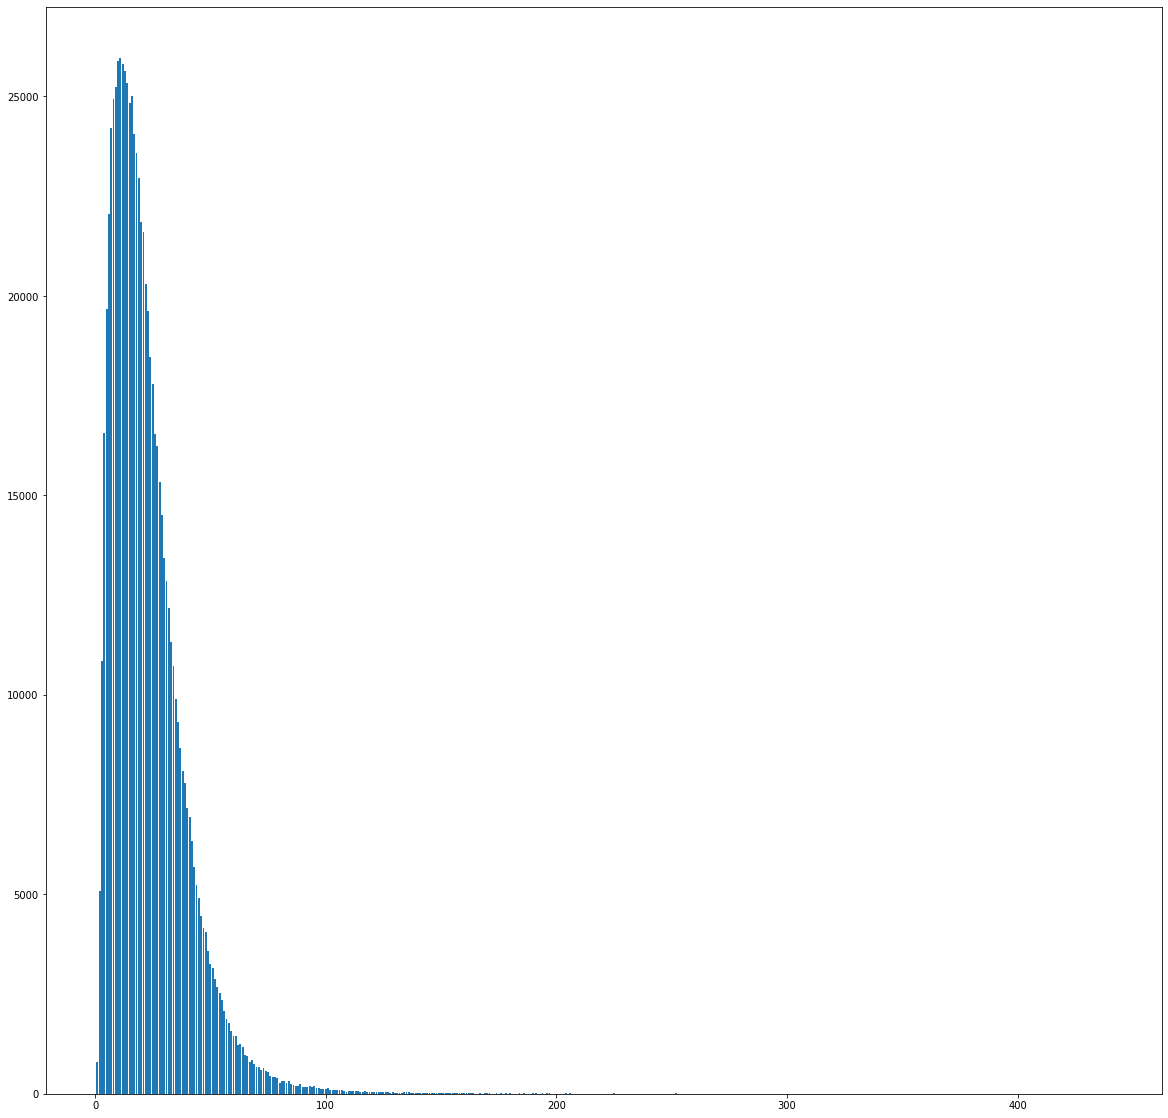

In [26]:
value_counts=train['premise_length'].value_counts()
dict_occurs=value_counts.to_dict()
x,y=list(dict_occurs.keys()),list(dict_occurs.values())
seq_len_visualizer(x,y),max(x)

Visualize en-vi hypothesis length distribution

(None, 97)

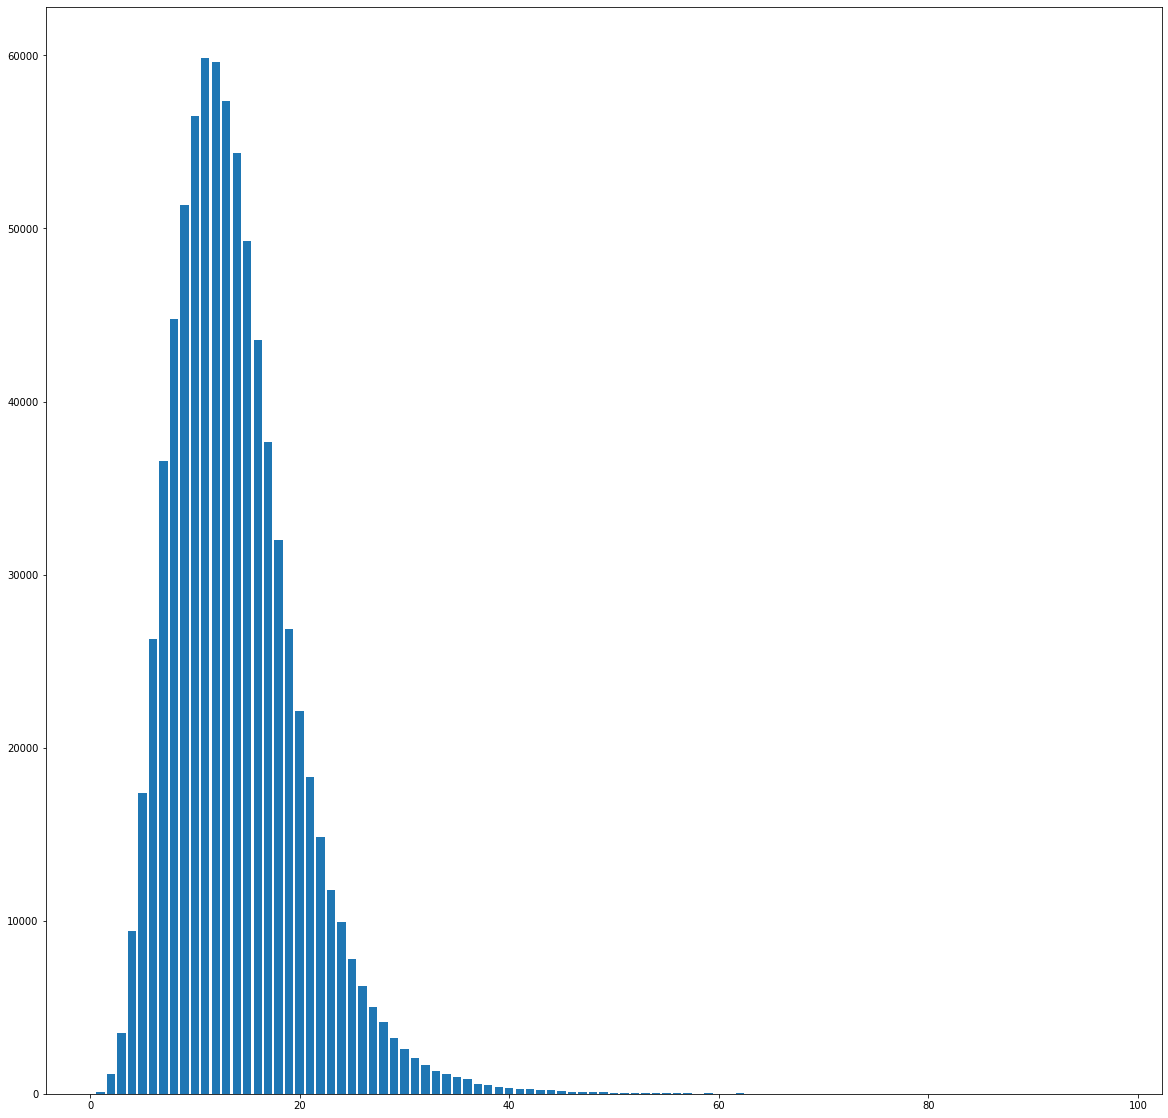

In [27]:
value_counts=train['hypothesis_length'].value_counts()
dict_occurs=value_counts.to_dict()
x,y=list(dict_occurs.keys()),list(dict_occurs.values())
seq_len_visualizer(x,y),max(x)

Visualize en-vi total length distribution


(None, 459)

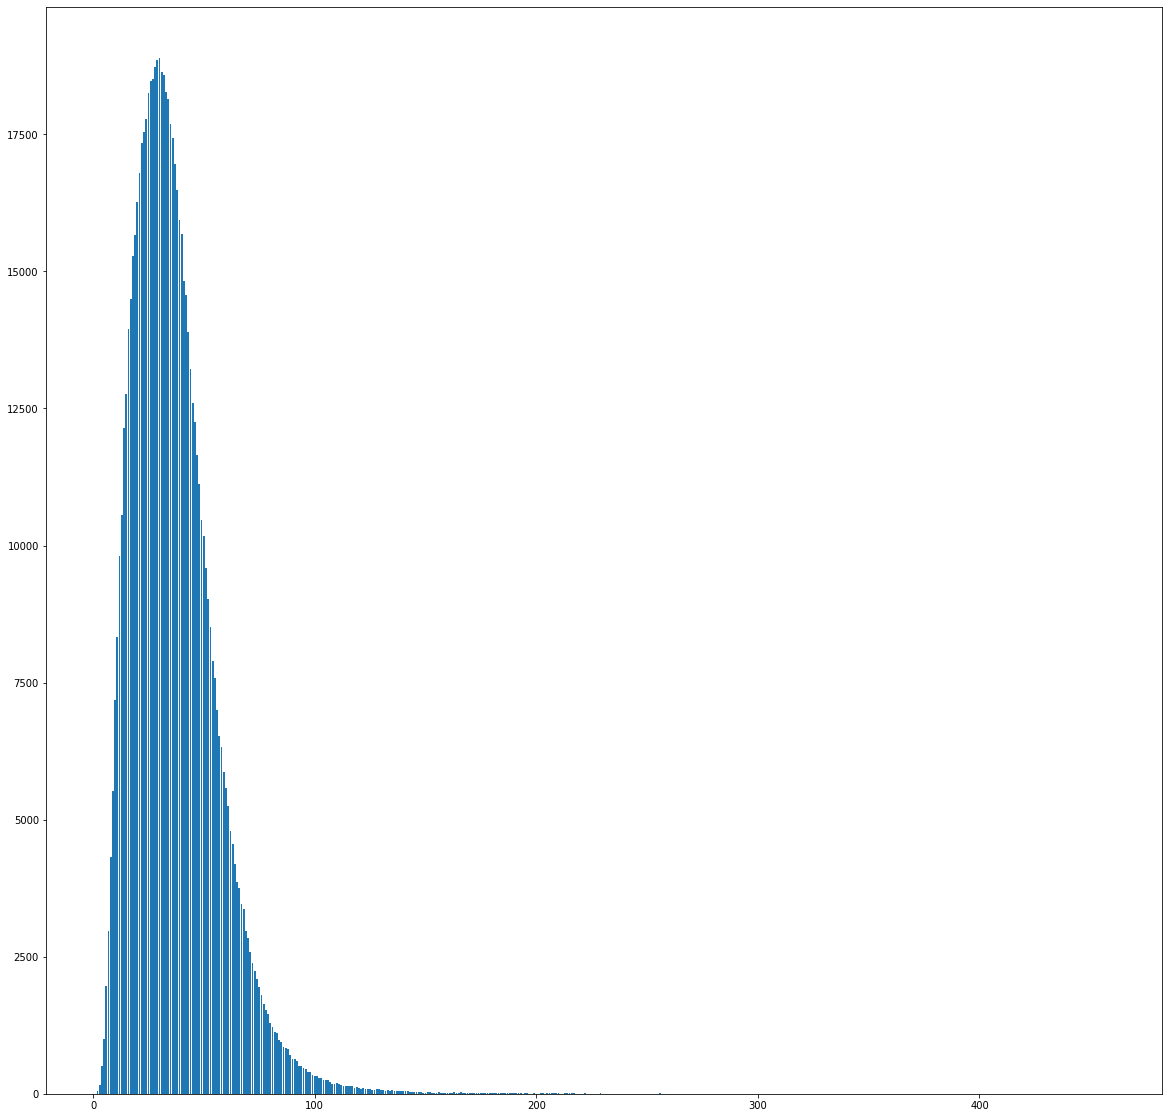

In [28]:
value_counts=train['total_length'].value_counts()
dict_occurs=value_counts.to_dict()
x,y=list(dict_occurs.keys()),list(dict_occurs.values())
seq_len_visualizer(x,y),max(x)

Visualize vi-vi premise length distribution



(None, 75)

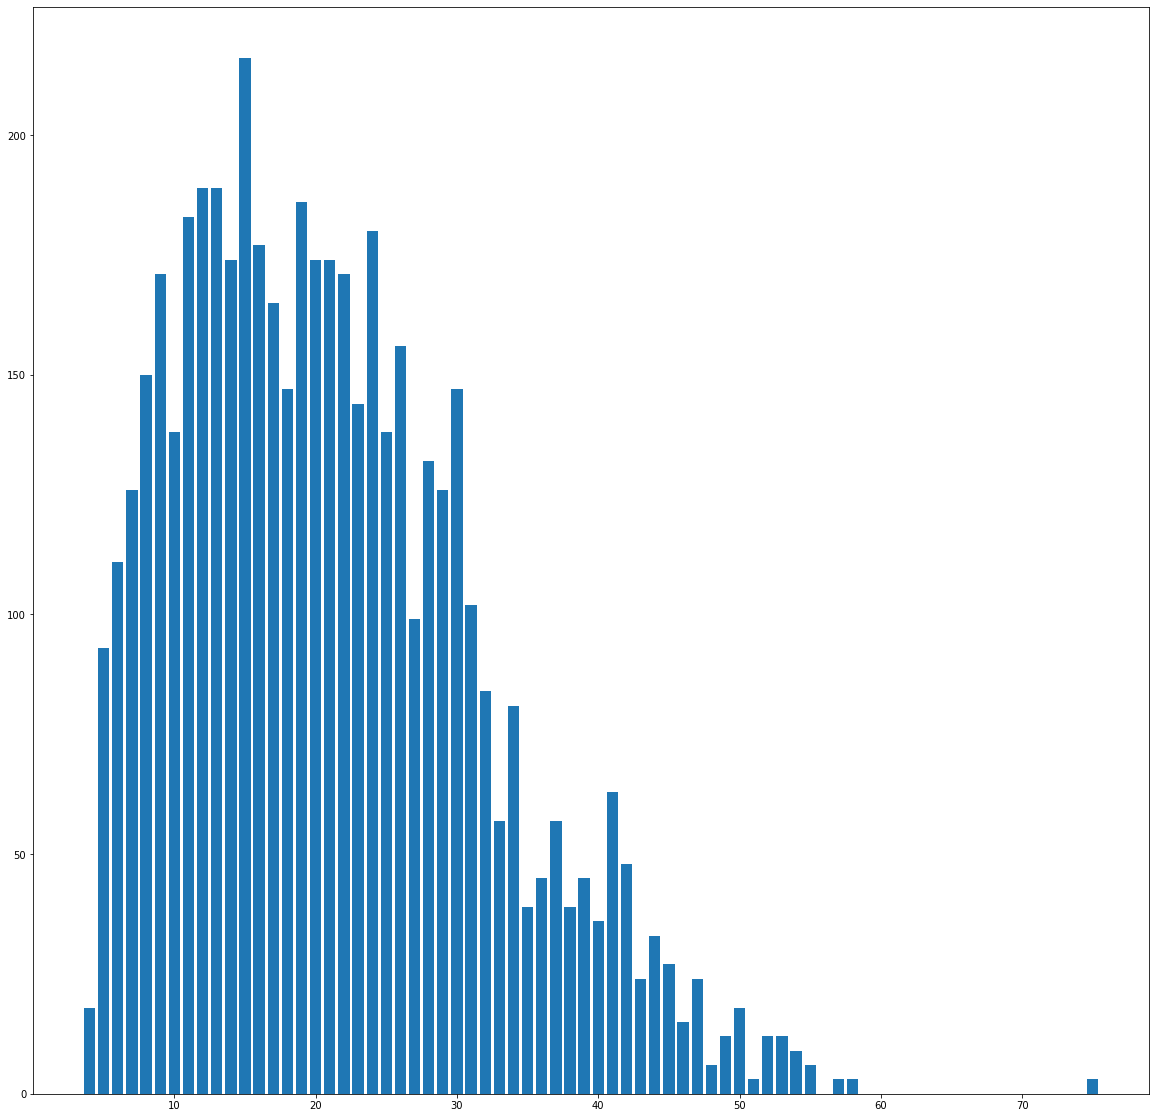

In [29]:
value_counts=valid['premise_length'].value_counts()
dict_occurs=value_counts.to_dict()
x,y=list(dict_occurs.keys()),list(dict_occurs.values())
seq_len_visualizer(x,y),max(x)

Visualize vi-vi hypothesis length distribution



(None, 35)

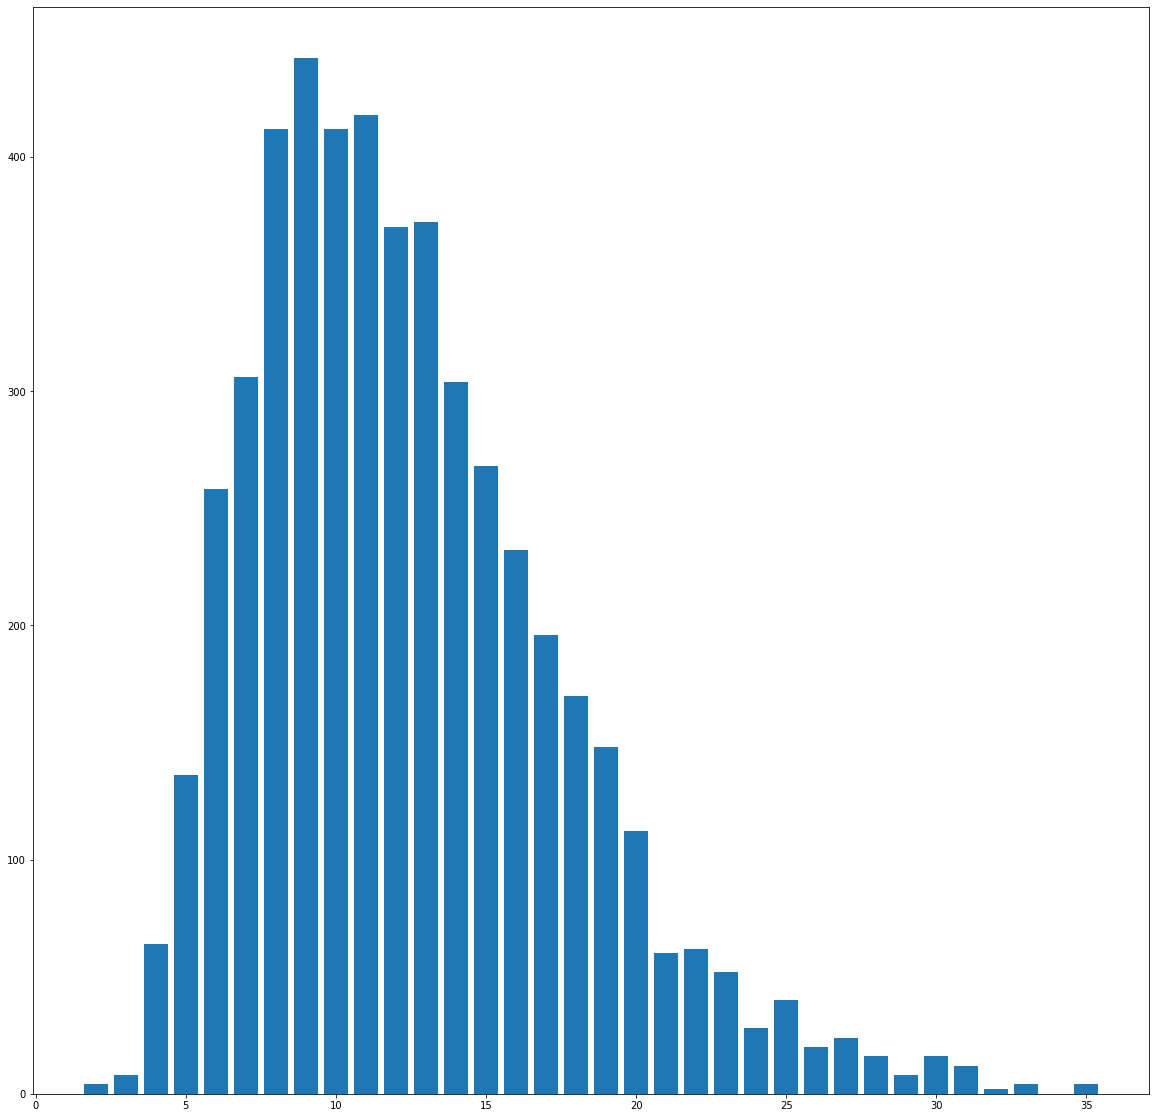

In [30]:
value_counts=valid['hypothesis_length'].value_counts()
dict_occurs=value_counts.to_dict()
x,y=list(dict_occurs.keys()),list(dict_occurs.values())
seq_len_visualizer(x,y),max(x)

Visualize vi-vi total length distribution



(None, 100)

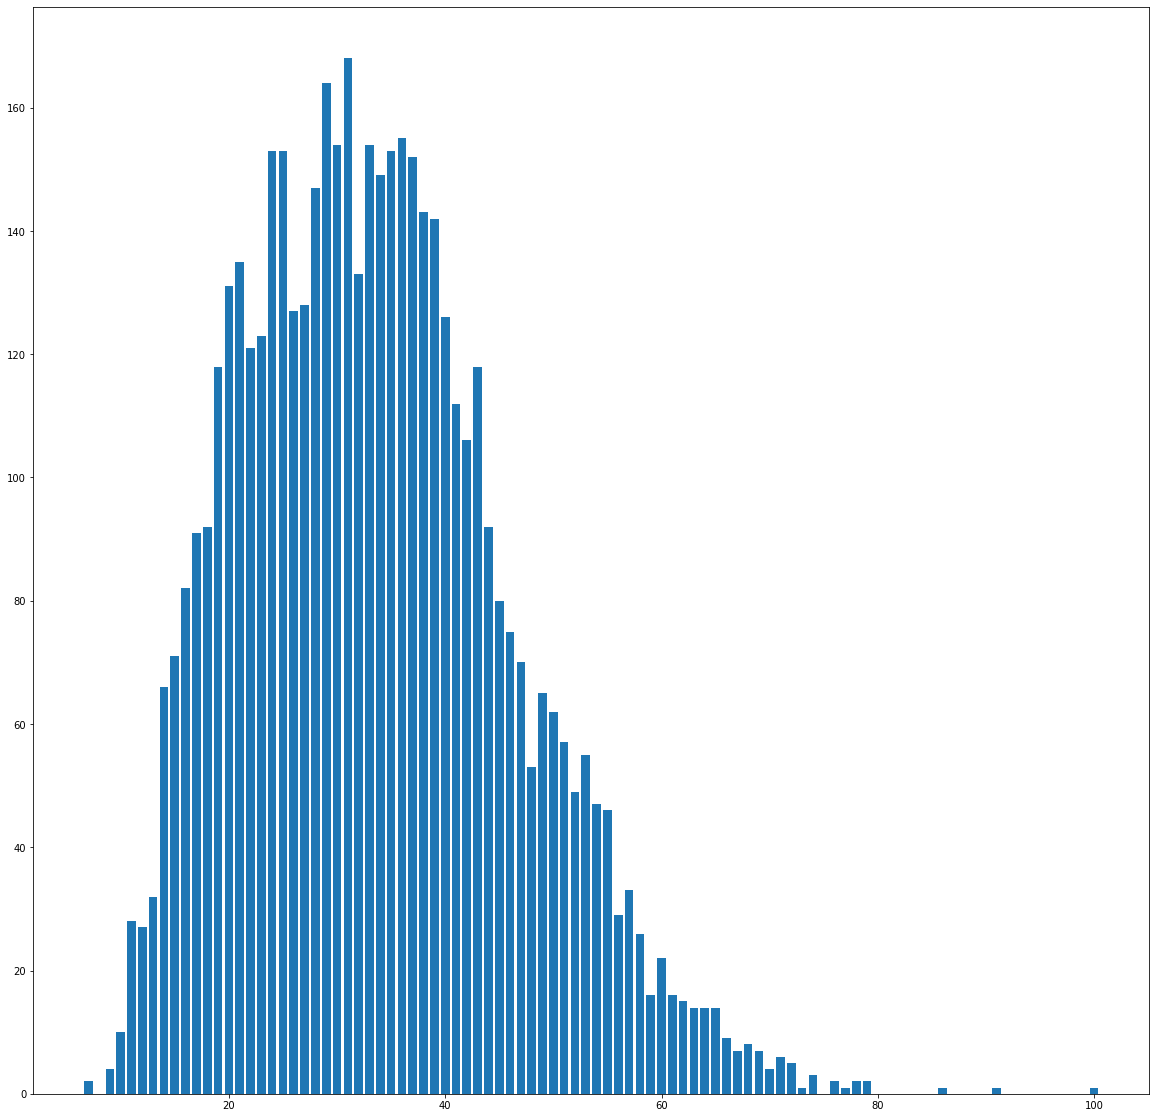

In [31]:
value_counts=valid['total_length'].value_counts()
dict_occurs=value_counts.to_dict()
x,y=list(dict_occurs.keys()),list(dict_occurs.values())
seq_len_visualizer(x,y),max(x)

Note: if using all sentences en-vi and vi-vi -> max length is 100



In [32]:
pre_dataset_directory="/content/drive/MyDrive/en-vi-nli/pre_dataset"
os.makedirs(pre_dataset_directory,exist_ok=True)

In [33]:
train.to_csv(f'{pre_dataset_directory}/train.csv',index=False)
valid.to_csv(f'{pre_dataset_directory}/valid.csv',index=False)

because of the limitation GPU Tesla T4, I only get the sentences which have max length 60 from each set



In [34]:
train=train[train['total_length']<=100]

In [35]:
train.to_csv(f'{pre_dataset_directory}/train_100.csv',index=False)


In [36]:
train

,premise,hypothesis,label,premise_language,hypothesis_language,premise_length,hypothesis_length,total_length
0,Conceptually cream skimming has two basic dime...,Sản phẩm và địa lý là những gì làm cho kem ski...,1,en,vi,10,14,24
1,you know during season and i guess at your lev...,Anh sẽ mất mọi thứ ở mức độ sau nếu người dân ...,0,en,vi,52,14,66
2,One of our number will carry out your instruct...,Một thành viên trong đội của tôi sẽ thực hiện ...,0,en,vi,10,21,31
3,How do you know All this their information again,Thông tin này thuộc về họ,0,en,vi,9,6,15
4,i tell you what though if you go price some of...,Đôi giày tennis có một tầm giá,1,en,vi,29,7,36
...,...,...,...,...,...,...,...,...
785243,Rõ ràng California có thể và phải làm tốt hơn,California không thể làm được gì tốt hơn,2,vi,vi,10,8,18
785244,Đó là một lần được đánh dấu là con đường đẹp n...,Rất nhiều các tòa nhà gốc đã được thay thế bởi...,1,vi,vi,35,16,51
785245,Houseboats là một truyền thống được bảo tồn tu...,Truyền thống của houseboats có nguồn gốc trong...,0,vi,vi,18,16,34
785246,Cáo phó thú vị đã ghi lại cuộc tranh luận trên...,Các cáo phó rất đẹp và được viết về những thàn...,1,vi,vi,34,19,53


In [43]:
train[train['total_length']==100]

,premise,hypothesis,label,premise_language,hypothesis_language,premise_length,hypothesis_length,total_length
3367,that is terrible well it is really bad that yo...,Con của tôi và những đứa con hàng xóm của tôi ...,2,en,vi,82,18,100
8303,and i was involved in Boy Scouts as young kid ...,Khi tôi còn trẻ chúng tôi thường đi cắm trại m...,0,en,vi,79,21,100
12945,I am not into this Multivista stuff because wh...,Anh ta đang ở trong nhà multivista,2,en,vi,93,7,100
14554,yes that is true it does not seem to workout t...,Tôi đã là một người bi quan cả cuộc đời tôi,1,en,vi,89,11,100
28264,In Newsweek for example Stuart Taylor Jr spend...,Liên quan đến ứng cử của bush một số tạp chí đ...,0,en,vi,67,33,100
...,...,...,...,...,...,...,...,...
773318,Vâng tôi không biết bất kỳ thống kê nào nhưng ...,Nó đã bắt người da đen một thời gian dài để đư...,0,vi,vi,75,25,100
776468,Và bạn muốn sử dụng một trong những chảo nước ...,Sử dụng một cái chảo nước sốt rộng hơn để trán...,1,vi,vi,84,16,100
777490,Um à có một cái là ơ thập khâu và nó là một bứ...,Tôi đã quá bận rộn với công việc nên tôi đã đặ...,1,vi,vi,71,29,100
777723,Những cư dân edinburgh nổi tiếng của thời kỳ n...,Edinburgh đã ở nhà với rất nhiều nhân vật được...,0,vi,vi,82,18,100
